In [ ]:
pip install nilearn

In [ ]:
import nibabel as nib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

In [ ]:
# Load MINC image
filename = "/content/t1_ai_msles2_1mm_pn3_rf20.mnc"
img = nib.load(filename)

In [ ]:
# Get image data as NumPy array
data = img.get_fdata()

In [ ]:
# Rescale to 0-255 and convert to uint8
data = (data/np.max(data))*255
data = data.astype(np.uint8)

In [ ]:
data.shape

(181, 217, 181)

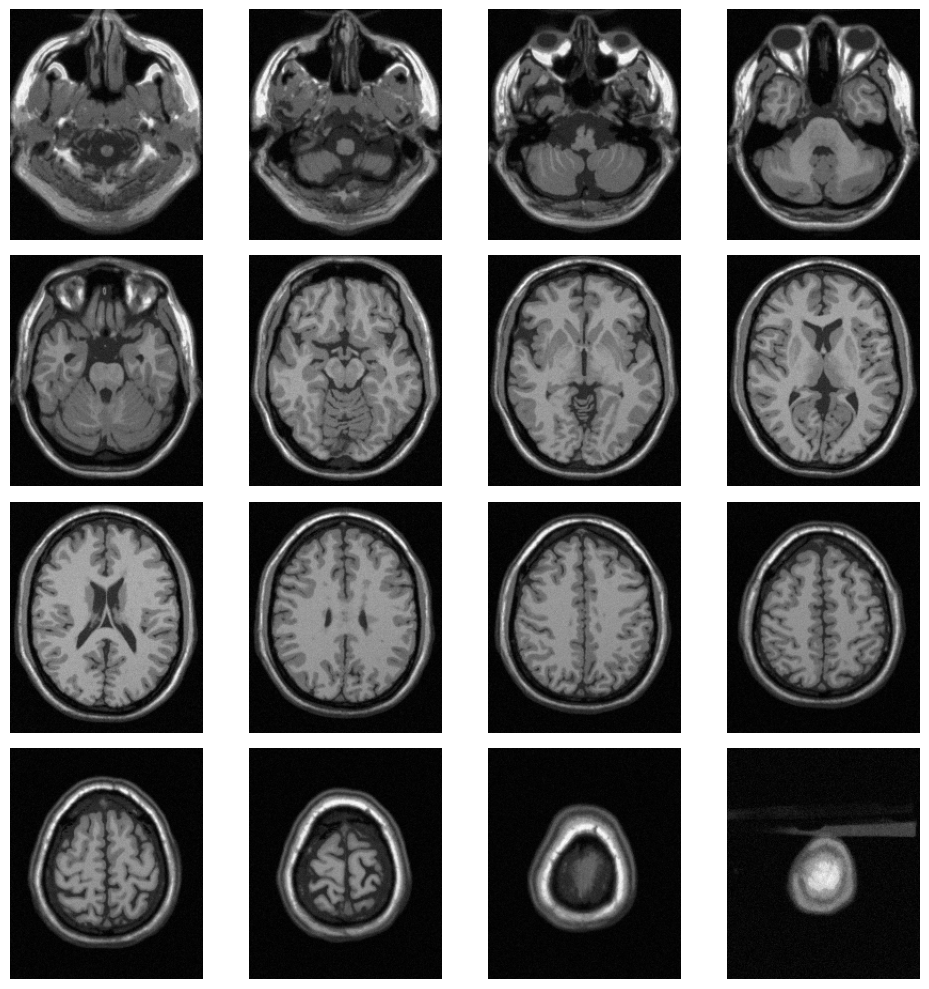

In [ ]:
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(data[img, :, :], 180), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()